In [3]:
#https://github.com/DEEPI-LAB/dbscan-python
#
from dbscan import DBSCAN
from scipy import io
import pandas as pd
 
# reading the CSV file
mycsvFile = pd.read_csv('my2DsampleData.csv')
x = mycsvFile.iloc[:, 1:3].values
#print(x)




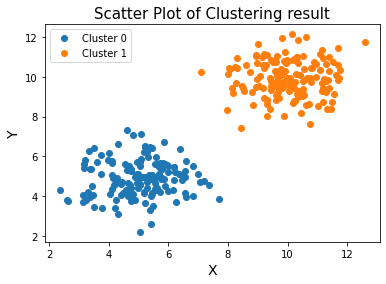

In [4]:
# INIT DBSCAN
dbscan = DBSCAN(x,1.5,4)
# CLUSTERING
idx,noise = dbscan.run()
# SORTING
g_cluster,n_cluster = dbscan.sort()
# Visualization
dbscan.plot()

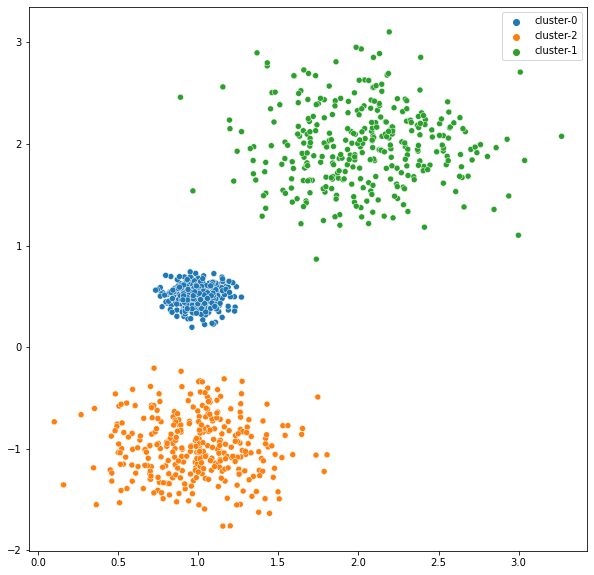

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs

centers = [[1, 0.5], [2, 2], [1, -1]] 
stds = [0.1, 0.4, 0.3] 
X, labels_true = make_blobs(n_samples=1000, centers=centers, cluster_std=stds, random_state=0)
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:,0],y= X[:,1], hue=["cluster-{}".format(x) for x in labels_true])

x = X

1.0
0.5
0.3333333333333333
0.25
0.2
0.16666666666666666
0.14285714285714285
0.125
0.1111111111111111
0.1


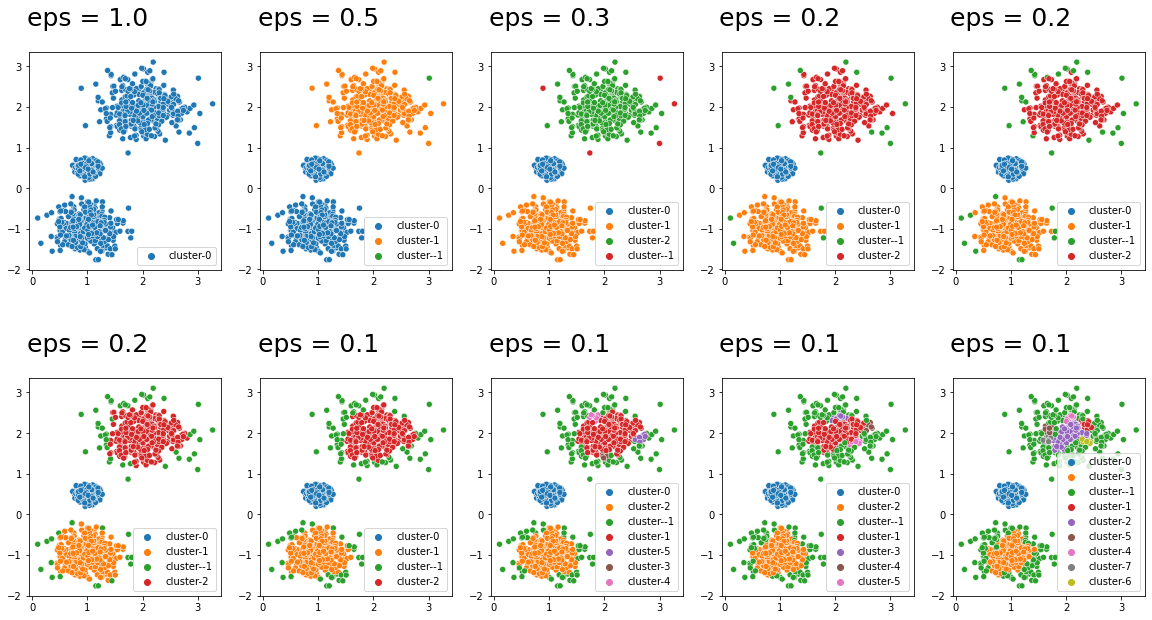

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    print(eps)
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=25, ha="center")
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1

<AxesSubplot:>

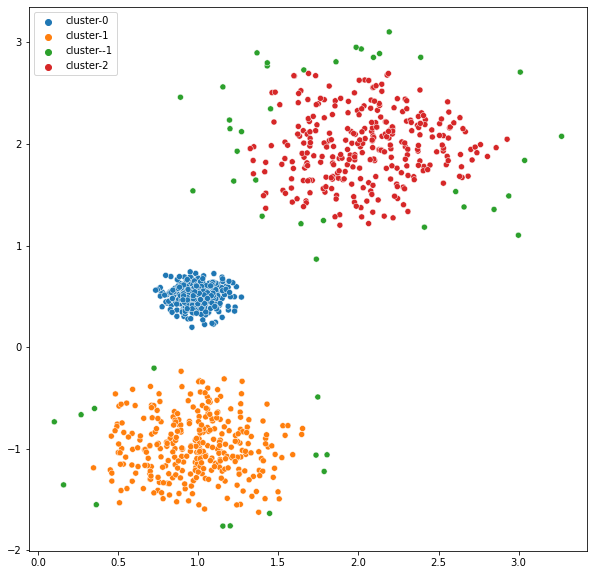

In [9]:
db = DBSCAN(eps=0.178, min_samples=10).fit(X)
labels = db.labels_
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=["cluster-{}".format(x) for x in labels])

In [10]:
from dbscan import DBSCAN
from scipy import io
import pandas as pd

#%% Run DEMO
#x = io.loadmat('./sample/sample.mat')['X']

WineData = pd.read_csv('wineTraining.csv')
WineData.head(n=6)
#WineDataQuality = WineData[0:WineData.shape[0]][0:1]
#WineDataQuality = WineData[0:][0:1]
WineDataQuality = WineData['Wine']
#WineInput = WineData.loc[:, WineData.columns != 'Wine']
WineInput = WineData.loc[:, ~WineData.columns.isin(['Wine'])]


from sklearn.preprocessing import StandardScaler
x = WineInput.values
#x = StandardScaler().fit_transform(x) # normalizing the features
stdscalar = StandardScaler()
stdscalar.fit(x)
x = stdscalar.transform(x)

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_WineInput = pd.DataFrame(x,columns=feat_cols)
normalised_WineInput.tail()

from sklearn.decomposition import PCA
pca_wine = PCA(n_components=2)
#principalComponents_Wine = pca_wine.fit_transform(x)
pca_wine.fit(x)
principalComponents_Wine = pca_wine.transform(x)

principal_wine_Df = pd.DataFrame(data = principalComponents_Wine
             , columns = ['principal component 1', 'principal component 2'])

dataX = principal_wine_Df

In [11]:
x = dataX.values
print(x)

[[ 3.29721551 -1.5067748 ]
 [ 2.21657903  0.29579202]
 [ 2.51106059 -1.0856022 ]
 [ 3.72347248 -2.82251052]
 [ 1.00980555 -0.89859623]
 [ 3.02583847 -2.1752346 ]
 [ 2.43535405 -1.22543523]
 [ 2.04323379 -1.65542878]
 [ 2.50019621 -0.96097685]
 [ 2.7434262  -0.83181355]
 [ 3.46827574 -1.37579136]
 [ 1.749665   -0.642906  ]
 [ 2.10972127 -0.71513976]
 [ 3.4473568  -1.1960492 ]
 [ 4.28442362 -2.17420011]
 [ 2.28704053 -1.70284565]
 [ 2.14691146 -2.36770632]
 [ 1.88525153 -1.66282804]
 [ 3.51192695 -2.57896619]
 [ 2.07404805 -1.10609621]
 [ 3.11413265 -0.84186093]
 [ 1.09312657 -0.28535309]
 [ 2.54352573  0.03538575]
 [ 1.6601922   0.48279293]
 [ 1.7763375   0.27462458]
 [ 0.99451086 -0.97303013]
 [ 1.77512897 -0.71861614]
 [ 1.2435599   0.06677782]
 [ 2.19037043 -0.73922339]
 [ 2.25645488 -0.23635709]
 [ 2.49432501 -1.28790985]
 [ 2.66226236 -1.51803687]
 [ 1.63643057 -0.09067575]
 [ 1.89034093 -1.67289846]
 [ 1.40861237 -0.72533201]
 [ 1.90966312 -0.21584707]
 [ 1.38237375 -0.67762951]
 

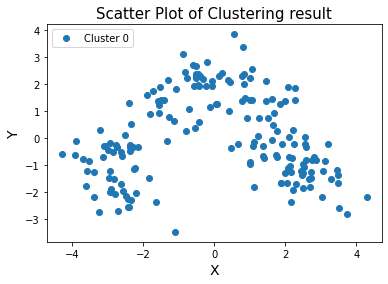

In [12]:
# INIT DBSCAN
dbscan = DBSCAN(x,1.5,4)
#dbscan = DBSCAN(x,1.1,4)
# CLUSTERING
idx,noise = dbscan.run()
# SORTING
g_cluster,n_cluster = dbscan.sort()
# Visualization
dbscan.plot()

In [13]:
X_scaled = dataX.values
#dbscan = DBSCAN(eps=0.4, min_samples=5)
dbscan = DBSCAN(eps=0.7, min_samples=6)

clusters = dbscan.fit_predict(X_scaled)



plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')

plt.xlabel("attr 0")

plt.ylabel("attr 1")

plt.show()

TypeError: __init__() got an unexpected keyword argument 'eps'

Cluster Number : 
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


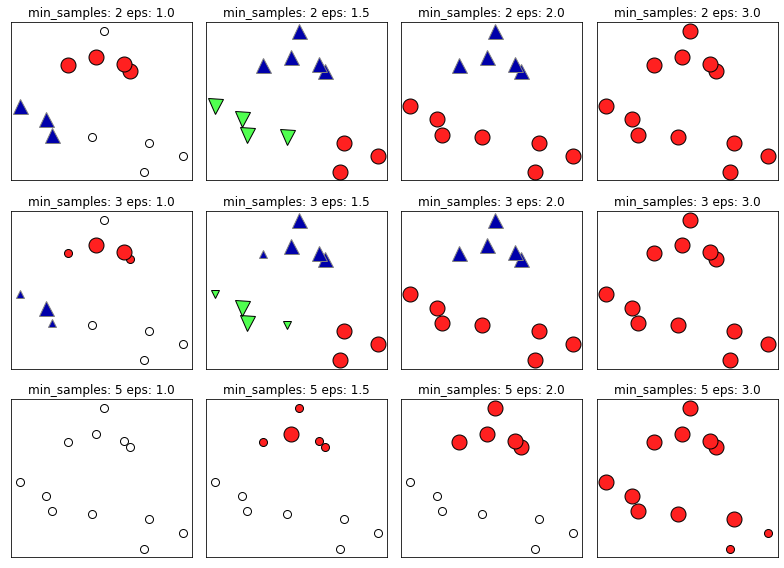

In [14]:
#https://m.blog.naver.com/ssdyka/221273386455
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# 인위적인 2차원 데이터셋

X, y = make_blobs(random_state=0, n_samples=12)



dbscan = DBSCAN()

clusters = dbscan.fit_predict(X)



print("Cluster Number : \n{}".format(clusters))

import mglearn

mglearn.plots.plot_dbscan()

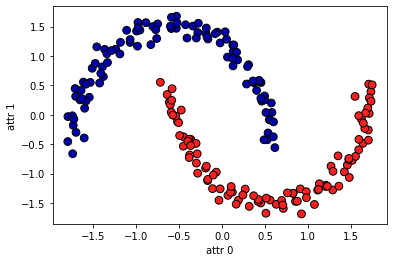

In [15]:
from sklearn.datasets import make_moons

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN

import matplotlib.pyplot as plt

import mglearn



X, y = make_moons(n_samples=200, noise=0.05, random_state=0)



scaler = StandardScaler()

scaler.fit(X)



X_scaled = scaler.transform(X)



dbscan = DBSCAN()

clusters = dbscan.fit_predict(X_scaled)



plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60, edgecolors='black')

plt.xlabel("attr 0")

plt.ylabel("attr 1")

plt.show()